# Recommendation engine

- We have limited information about client. There are two posible scenarios: logged and not logged in customer.  
Information that we have as an input for logged in customer:  
&nbsp;&nbsp;1. three favourite categories  
&nbsp;&nbsp;2. geolocation (City, State)  
&nbsp;&nbsp;3. as a hidden information we have loggin in date
- as an output we want to have 10 products



# Brainstorm
1. Simple approach as the first engine.
- Statistical apporach:
    - Recommend one expensive, one cheap and one random product with good reviews from each category and a top seller from past month .
    - For not logged in customers take 3 most popular categories and perform same logic.
2. More advanced ideas:
    - perform k-means algorithm
    - a-priori approach
    - machine learing clasiffication model 



In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 3

sys.path.append("/Users/skronski/Documents/Projects/e_commerce/00_programs")
from directories import directories_path_setup
from directories import update_gitignore
from directories import reading_files

directories = directories_path_setup(
    "e_commerce", "/Users/skronski/Documents/Projects/"
)
files_dict = reading_files(directories)

olist_sellers_dataset = files_dict["olist_sellers_dataset"]
product_category_name_translation = files_dict["product_category_name_translation"]
olist_orders_dataset = files_dict["olist_orders_dataset"]
olist_order_items_dataset = files_dict["olist_order_items_dataset"]
olist_customers_dataset = files_dict["olist_customers_dataset"]
olist_order_payments_dataset = files_dict["olist_order_payments_dataset"]
olist_order_reviews_dataset = files_dict["olist_order_reviews_dataset"]
olist_products_dataset = files_dict["olist_products_dataset"]
olist_geolocation_dataset = files_dict["olist_geolocation_dataset"]

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_1962/2129575980.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The /Users/skronski/Documents/Projects/e_commerce/00_programs exists already.
The /Users/skronski/Documents/Projects/e_commerce/01_input exists already.
The /Users/skronski/Documents/Projects/e_commerce/02_output exists already.
The /Users/skronski/Documents/Projects/e_commerce/03_temporary exists already.
['/Users/skronski/Documents/Projects/e_commerce/01_input/olist_sellers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/product_category_name_translation.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_orders_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_items_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_customers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_geolocation_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_payments_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_reviews

- Input structure a tuple od two tuples:   
   
 ((`favourite_cateogry_1`, `favourite_cateogry_2`, `favourite_cateogry_3`, (`customer_city`, `customer_state`))  
   
- outpus structure a tupe od 10 products:  
   
(`product_1`, `product_2`, ... ,`product_10`)

# Use case  
- user 1: (cama_mesa_banho, papelaria, fashion_calcados), (sao paulo, SP)  
- user 2: (esporte_lazer, moveis_decoracao, telefonia), (rio de janeiro, RJ)  
- user not logged in: (), ()  

In [4]:
def process_user_info(user_info):
    if not user_info[0]:  # Check if user is not logged in
        print("User not logged in.")
        return

    # Unpack user information
    categories = user_info[0]
    location = user_info[1]

    # Print user's favorite categories
    print("User's favorite categories:")
    for i, category in enumerate(categories, start=1):
        print(f"{i}. {category}")

    # Print user's location
    print("User's location:")
    print(f"City: {location[0]}")
    print(f"State: {location[1]}")


# Define user information as tuples
user1 = (("cama_mesa_banho", "papelaria", "fashion_calcados"), ("sao paulo", "SP"))
user2 = (("esporte_lazer", "moveis_decoracao", "telefonia"), ("rio de janeiro", "RJ"))
user_not_logged_in = ((), ())

# Process each user's information
print("User 1:")
process_user_info(user1)

print("\nUser 2:")
process_user_info(user2)

print("\nUser not logged in:")
process_user_info(user_not_logged_in)

User 1:
User's favorite categories:
1. cama_mesa_banho
2. papelaria
3. fashion_calcados
User's location:
City: sao paulo
State: SP

User 2:
User's favorite categories:
1. esporte_lazer
2. moveis_decoracao
3. telefonia
User's location:
City: rio de janeiro
State: RJ

User not logged in:
User not logged in.


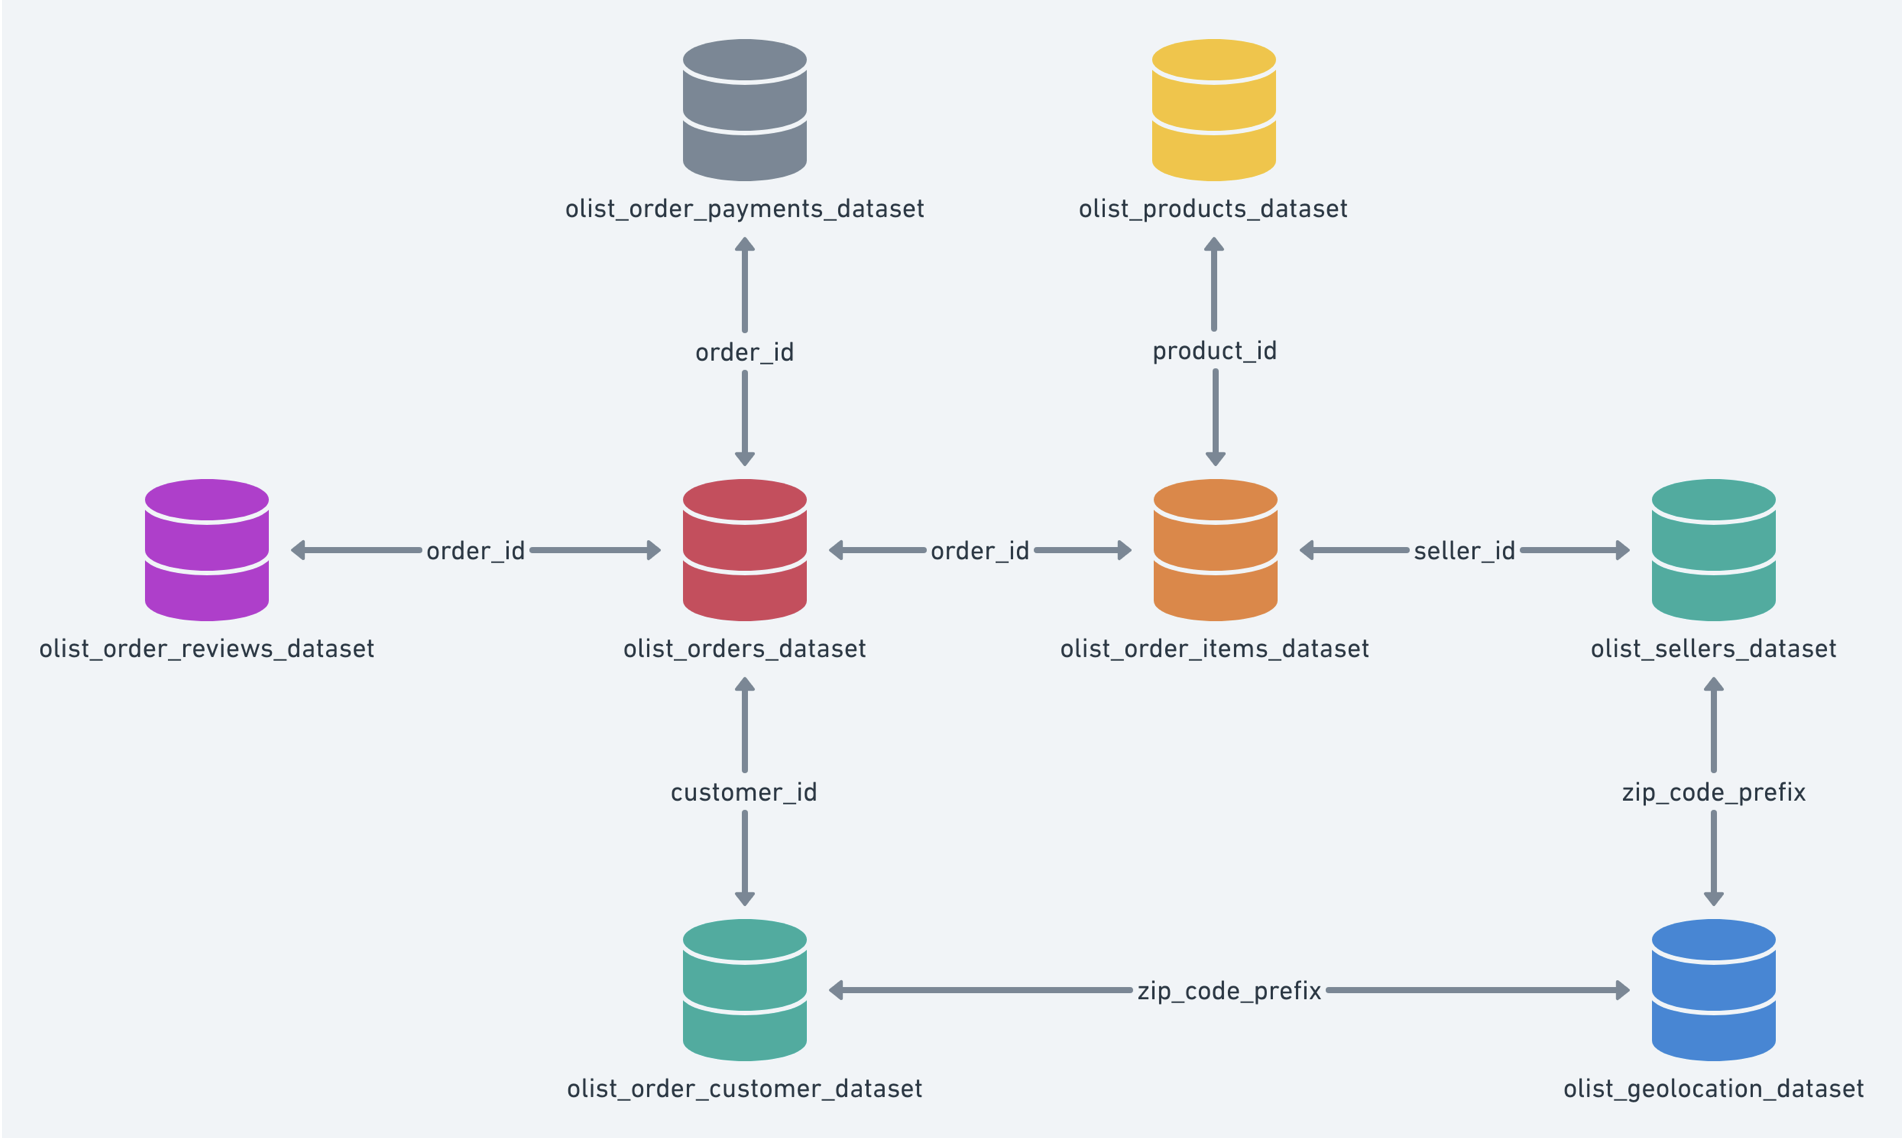  


In [17]:
orders_items = olist_orders_dataset.loc[:, ["order_id", "customer_id"]].merge(
    olist_order_items_dataset.loc[:, ["price", "product_id", "order_id"]],
    on="order_id",
    how="left",
)

orders_products = orders_items.merge(
    olist_products_dataset.loc[:, ["product_category_name", "product_id"]],
    on="product_id",
    how="left",
)

orders_product_reviews = orders_products.merge(
    olist_order_reviews_dataset.loc[:, ["review_score", "order_id"]],
    on="order_id",
    how="left",
)

orders_product_reviews_customer_location = orders_product_reviews.merge(
    olist_customers_dataset.loc[:, ["customer_id", "customer_city", "customer_state"]],
    on="customer_id",
    how="left",
)